In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Observation 

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='STDs (number)', ylabel='count'>

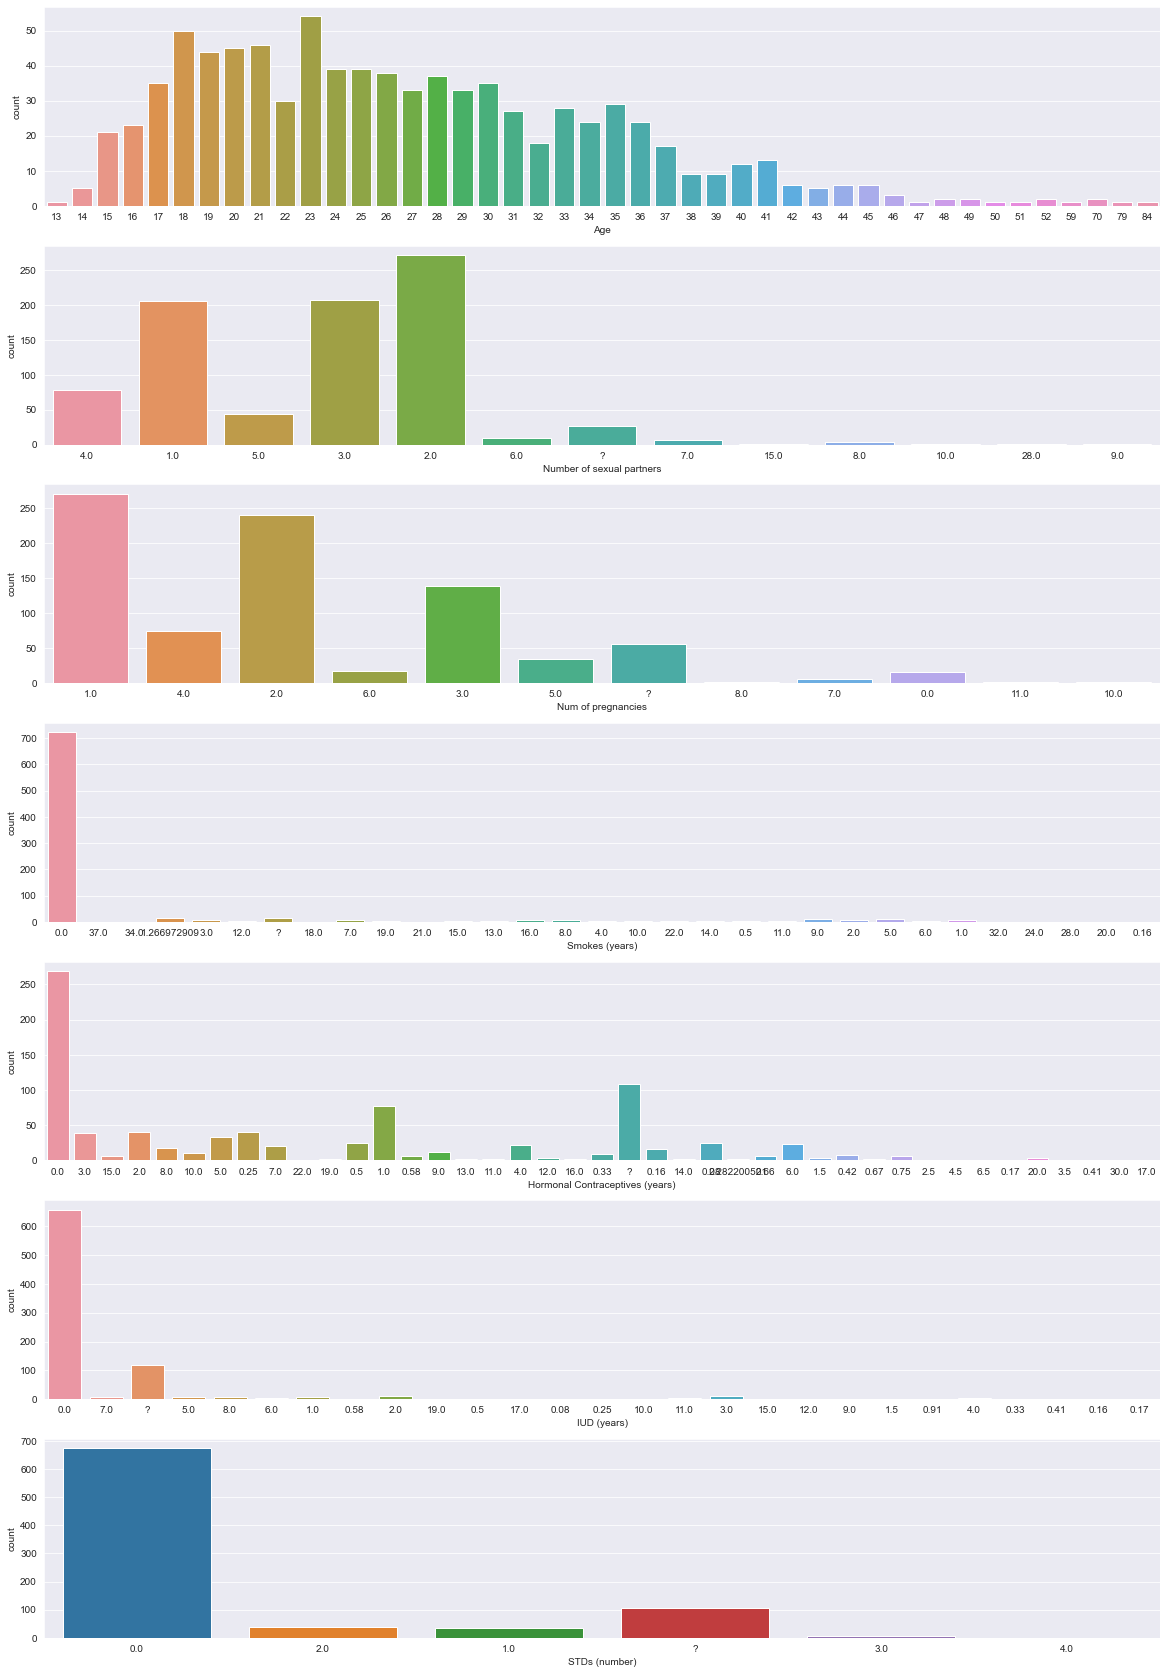

In [4]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,30))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

# Data Preprocessing

In [5]:
df = df.replace('?', np.nan)

### Dealing with NaN values and dtypes

In [6]:
df = df.dropna(axis='columns',thresh=200)
df = df.dropna()
df = df.apply(pd.to_numeric)

In [7]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.0,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.0,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,27.264970,2.523952,17.142216,2.323353,0.143713,1.235524,0.458953,0.643713,2.290037,0.112275,0.530030,0.097305,0.166168,0.055389,0.0,0.005988,0.053892,0.022455,0.001497,0.001497,0.001497,0.0,0.019461,0.001497,0.002994,0.092814,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.067365
std,8.727432,1.640299,2.852046,1.465319,0.351061,4.193611,2.336308,0.479260,3.724400,0.315942,2.001308,0.296595,0.551073,0.228910,0.0,0.077208,0.225974,0.148269,0.038691,0.038691,0.038691,0.0,0.138242,0.038691,0.054677,0.310355,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.250841
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    int64  
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    float64
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             668 non-null    float64
 8   Hormonal Contraceptives (years)     668 non-null    float64
 9   IUD                                 668 non-null    float64
 10  IUD (years)                         668 non-null    float64
 11  STDs                                668 non-n

### Shuffle, Split and normalize dataset

In [9]:
np.random.seed(12)
df = df.iloc[np.random.permutation(len(df))]

X = df.iloc[:,0:32]
Y = df.iloc[:,33]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
X_train = mc.fit_transform(X_train)
X_test = mc.fit_transform(X_test)

### Creating Models

In [10]:
def models(X_train, Y_train):
    #Linear Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    #Tree Methid
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree.fit(X_train, Y_train)
    
    forest = RandomForestClassifier(n_estimators = 10, criterion="entropy", random_state=0)
    forest.fit(X_train, Y_train)
    
    import tensorflow as tf
    from tensorflow.keras.models import Sequential, Model
    from tensorflow.keras import layers
    cnn = tf.keras.models.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(200, activation='relu'),
        layers.Dropout(0.2),    
        layers.Dense(1, activation= 'sigmoid')
    ])
    cnn.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])
    cnn_history = cnn.fit(x=X_train, y=Y_train,  
                          validation_split=0.2, epochs=20, 
                          batch_size=100, verbose=2) 
        
    return [log,tree,forest,cnn]

### Start Training

In [11]:
models = models(X_train, Y_train)

Epoch 1/20
5/5 - 0s - loss: 0.5998 - accuracy: 0.8501 - val_loss: 0.4249 - val_accuracy: 0.9439
Epoch 2/20
5/5 - 0s - loss: 0.4026 - accuracy: 0.9321 - val_loss: 0.2975 - val_accuracy: 0.9439
Epoch 3/20
5/5 - 0s - loss: 0.3011 - accuracy: 0.9321 - val_loss: 0.2464 - val_accuracy: 0.9439
Epoch 4/20
5/5 - 0s - loss: 0.2573 - accuracy: 0.9321 - val_loss: 0.2172 - val_accuracy: 0.9439
Epoch 5/20
5/5 - 0s - loss: 0.2112 - accuracy: 0.9321 - val_loss: 0.1840 - val_accuracy: 0.9346
Epoch 6/20
5/5 - 0s - loss: 0.1580 - accuracy: 0.9344 - val_loss: 0.1680 - val_accuracy: 0.9252
Epoch 7/20
5/5 - 0s - loss: 0.1296 - accuracy: 0.9555 - val_loss: 0.1680 - val_accuracy: 0.9252
Epoch 8/20
5/5 - 0s - loss: 0.1037 - accuracy: 0.9625 - val_loss: 0.1687 - val_accuracy: 0.9252
Epoch 9/20
5/5 - 0s - loss: 0.0958 - accuracy: 0.9602 - val_loss: 0.1720 - val_accuracy: 0.9252
Epoch 10/20
5/5 - 0s - loss: 0.0851 - accuracy: 0.9649 - val_loss: 0.1811 - val_accuracy: 0.9252
Epoch 11/20
5/5 - 0s - loss: 0.0804 - a

### Evaluation

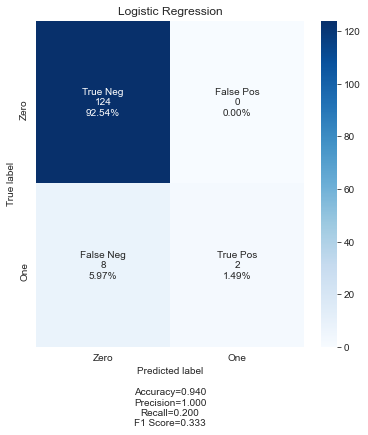

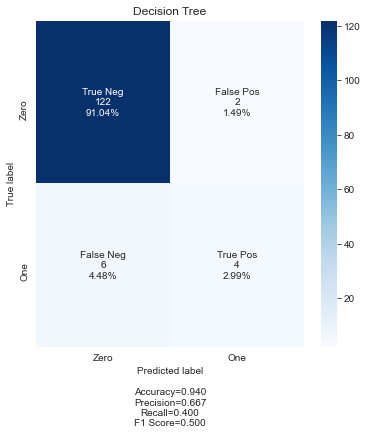

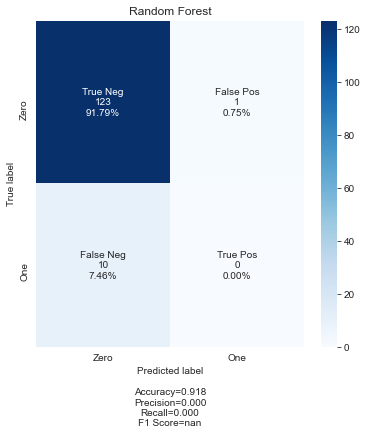

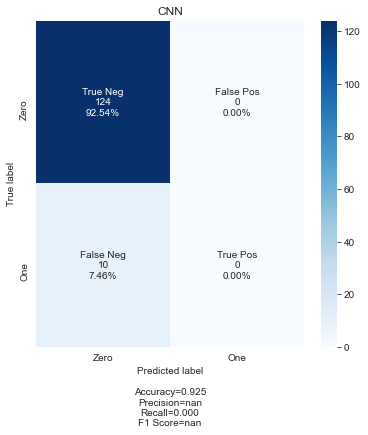

In [12]:
from utils import make_confusion_matrix
from sklearn.metrics import confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
titles = ['Logistic Regression','Decision Tree','Random Forest','CNN']
for i in range(4):
    if i is 3:
        Y_pred = models[i].predict(X_test)
        Y_pred = np.argmax(Y_pred,axis = -1)
    else:
        Y_pred = models[i].predict(X_test)
    
        
        
    make_confusion_matrix(confusion_matrix(Y_test,Y_pred), 
                        group_names=labels,
                        title = titles[i],
                        figsize = (6,6),
                        categories=categories)    


In [13]:
import pickle
Pkl_Filename = "Pickle_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(models[1], file)